<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-1" data-toc-modified-id="Dataset-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset 1</a></span><ul class="toc-item"><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Treinando Modelo</a></span></li></ul></li></ul></div>

O objetivo deste notebook é alocar toda a análise referente ao modelo de Support Vector Machines, sendo proposta, em um primeiro momento, a resolução de um problema de classificação envolvendo diferentes datasets e, logo em seguida, o desenvolvimento de um classificador de Spams.

## Dataset 1

O primeiro dataset é composto por dados em 2 dimensões linearmente separáveis por uma fronteira de decisão.

### Explorando os Dados

In [4]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
# Lendo arquivo
data1 = sio.loadmat('ex6data1.mat')

In [3]:
# Verificando output
data1

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

In [6]:
# Separando dados
X = data1['X']
y = data1['y']

# Contabilizando
print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

print(f'\nPrimeira linha de X: \n{X[0]}')

Dimensões de X: (51, 2)
Dimensões de y: (51, 1)

Primeira linha de X: 
[1.9643 4.5957]


In [26]:
# Transformando em dataframe
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y
df.head()

,x1,x2,label
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [30]:
# Indexando classes
pos = df[df.iloc[:, 2] == 1]
neg = df[df.iloc[:, 2] == 0]

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


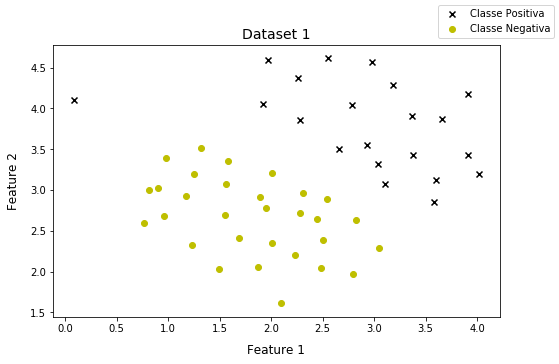

In [60]:
# Importando bibliotecas para plotagem
import matplotlib.pyplot as plt
%matplotlib inline

# Plotando dados
plt, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pos.iloc[:, 0], pos.iloc[:, 1], marker='x', c='k', label='Classe Positiva')
ax.scatter(neg.iloc[:, 0], neg.iloc[:, 1], marker='o', c='y', label='Classe Negativa')
ax.set_title('Dataset 1', size=14)
ax.set_xlabel('Feature 1', size=12, labelpad=10)
ax.set_ylabel('Feature 2', size=12, labelpad=10)
plt.legend()
plt.show()

Vemos, a partir da plotagem, que os dados realmente são linearmente separáveis. Entretanto, é possível notar um ```outlier``` da classe positiva na extremidade superior esquerda. Vamos estudar o modelo SVM alterando seu parâmetro C.

### Treinando Modelo